# Are stopwords really useless?

<i>Maurizio Scibilia</i>
<br>
November 2020

Sentiment Analysis is probably one of the simplest applications for NLP (Natural Language Processing). The ability for a computer to get the polarity of a user's comment has beeen, since the beginning, extremely interesting. <em>Moore's law</em> rules unformally that in about two years we will double the number of transistors on a microchip at half the price. This has been valid for a long time, but it's now probably at its end and someone claims that 2022 is goonna be its death's year. Now, in the meantime, something else than computation power is spreading its wings and it's what we refer to as <em>Big Data</em>.

This huge amount of data that is exponentially growing is the reason of the machine learning's rise, and now of the neural network's rise (deep learning).
Let's consider a big company, selling some item, or providing a service, in a world where every customer is somehow brought to publish something about its experience. It can be a new pair of shoes, the brand new song of a teen group, a dinner in that cool fancy new restaurant downtown, the new mobile internet connection of our old provider. In every case, especially where the number of comments grows exponentially, we need an automatic way to translate what is <em>unstructured</em> (human thoughts) in categories that a computer can process. The simplest form is simply getting if the user is expressing a good or a bad mood about its purchase. If we have ten thousand comments about our new service and seven thousand express a positive mood, that's something we could start from.

<em>Kaggle</em> is probably the most famous data science community and it was founded in 2010. They publish many datasets, hosting plenty of competitions, often with prizes in money. In my analysis, I used a dataset released by <a href="https://www.kaggle.com">Kaggle</a>, whose name is: <a href="https://www.kaggle.com/kazanova/sentiment140">Sentiment140 dataset with 1.6 million tweets</a>.
It consists of 1,600,000 tweets, half labeled as positive and half negative.

From the Naive Bayes classification algorythms to the neural networks used to build modern chatbots, NLP' impact is rising more and more. In this space, I would like to focus on details or issues related to NLP, possibly practicing some techniques and trying to see if we can gain some extra-knowledge we can use.

## Today's Topic

No matter if we use old classification algorithms or modern neural networks, preprocessing is a fundamental first step in our analysis. We could consider it like the part of digesting that is done in our mouths. The usual steps we must perform in preprocessing are:
<ol>
    <li>Lowercasing</li>
    <li>Removing punctuation</li>
    <li>Removing stopwords</li>
    <li>Stemming/Lemmatizing</li>
    <li>Tokenizing the string</li>
</ol>

An analysis of these steps is out the scope of this analysis. I just want to focus on the step 3 that is somehow a classic in the classic. Stopwords are the words that we strongly believe don't actually bring any meaning to our sentence. One of the steps in the preprocessing of our text is removing these words, in order to reduce the size of our dataset and, doing so, to improve the performances of our algorithm. Looking at some of these stopwords, it seemed to me that they were not completely meaningless, and that they could somehow bring value to our analysis. I decided to perform a double analysis, using LSTM (Long Short Term Memory). In one we'll remove the stopwords and in one we won't. At the end we will check which analysis provided the best results.

## Importing libraries

In [1]:
# libraries - basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# libraries - re
import re

In [3]:
# libraries - tensorflow
import tensorflow as tf

In [4]:
# libraries - nltk
import nltk 
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/maurizioscibilia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# libraries - sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

## Dataset preprocessing

In [6]:
# loading dataset
df = pd.read_csv('../archive/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',
                 header = None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


The dataset has six fields. We'll keep the first and the last:
<ul>
    <li>the polarity of the tweet (0 = negative, 4 = positive)</li>
    <li>the text of the tweet</li>
</ul>

In [7]:
# dropping the other columns
df = df.drop([1, 2, 3, 4], axis = 1)

# renaming the dataset's columns
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [8]:
df.tail()

,sentiment,text
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


Now, we rename the codes for the sentiments as 'Negative' and 'Positive'.

In [9]:
# translating the codes to sentiments
num_to_sentiment = {0:"Negative", 4:"Positive"}

df.sentiment = df.sentiment.apply(lambda x: num_to_sentiment[x])
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.tail()

,sentiment,text
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...
1599999,Positive,happy #charitytuesday @theNSPCC @SparksCharity...


Finally, we check the numbers of negative and positive tweets:

In [11]:
# positive and negative tweets number is the same
df.sentiment.value_counts()

Negative    800000
Positive    800000
Name: sentiment, dtype: int64

## Text Preprocessing

As I anticipated, in this phase we'll try two different approaches. In one, we will remove the stopwords, in  the second one we won't. To do so, we build a <em>preprocess</em> function with a <em>remove</em> parameter, set  to <em>True</em> by default. We begin, downloading the stopwords, the stemmer for the English language and the regular expression we'll use to remove internet addresses.

In [12]:
# pre preprocessing
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [13]:
# preprocess function
def preprocess(text, stem=False, remove=True):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if remove:
        if token not in stop_words:
          if stem:
            tokens.append(stemmer.stem(token))
          else:
            tokens.append(token)
    else:
        if stem:
            tokens.append(stemmer.stem(token))
        else:
            tokens.append(token)
  return " ".join(tokens)

# 1. No stopwords

The next step is to fork our story and start <u>working on the dataset where we remove our stopwords</u>. First, we preprocess the texts.

In [14]:
df_remove_sw = df.copy()
df_remove_sw.text = df.text.apply(lambda x: preprocess(x))

## Train and Test Split

In this part, we're gonna split the dataset in two parts: one for the training of the neural network, and the other one to check its accuracy. Usually we keep one fourth of our data for validation but, considering that we have 1,600,000 tweets, I decided to reduce the percentage of the validation data to five percent. It's common sense more than a rule. I set also the max length of the tokenized sentences and I decided to set this value at 30, which is probably high. But, for this analysis, I prefer to spend some time more than losing any information.

In [15]:
TEST_SIZE = 0.05
MAX_SEQUENCE_LENGTH = 30

Now we split the data using the appropriate <em>sklearn</em> function. We set <em>random_state</em> for reproducibility of results.

In [16]:
# splitting dataset in train and test sets for both our datasets
train_data, test_data = train_test_split(df_remove_sw, 
                                        test_size = TEST_SIZE,
                                        random_state = 169)

In [17]:
# checking dimensions of our new datasets
print("Train Data size without stopwords:", len(train_data))
print("Test Data size without stopwords", len(test_data))

Train Data size without stopwords: 1520000
Test Data size without stopwords 80000


## Tokenization

We still didn't tokenize our text. To do so, we are gonna import the appropriate method from tensorflow. After that, we will apply it on our preprocessed texts, build our vocabulary and check its length.

In [18]:
# importing the Tokenizer method
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size without stopwords:", vocab_size)

Vocabulary Size without stopwords: 324494


We have chosen a length of 30 words for tweet, but obviously we will often have less words. One of the many steps in preprocessing is called <em>padding</em>, and it consists in adding zeros for empty spaces, meaning:

<em>MAX_SEQUENCE_LENGTH - len(text)</em>

In some, rare, cases, this number could cut the tweet length, when we have more than 30 words.

In order to do so, we import the <em>pad_sequences</em> method from <em>tensorflow</em> and apply on our datasets' texts.

In [19]:
# importing pad_sequences method
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X without stopwords shape:", x_train.shape)
print("Testing X without stopwords shape:", x_test.shape)

Training X without stopwords shape: (1520000, 30)
Testing X without stopwords shape: (80000, 30)


In [20]:
# instantiating and fitting our LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

# transforming our encoder instances
y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

# reshaping them
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# showing their shapes
print("y_train removing stopwords shape:", y_train.shape)
print("y_test removing stopwords shape:", y_test.shape)

y_train removing stopwords shape: (1520000, 1)
y_test removing stopwords shape: (80000, 1)


## Word Embedding 

Word Embedding is a way to represent words as vectors in a multidimensional space. The sense of it is to somehow translate the words relationships into vectors (the vectors representing those words) relationships. This way, words with a similar meaning have a similar representation. There are different methods for word embedding and probably the two most famous of them are <em>Word2Vec</em> and <em>GloVe</em>. In our analysis, we are gonna use the second one.

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

Among the parameters we're setting:
<ul>
    <li><em>EMBEDDING_DIM</em>: the dimensions for our embedding</li>
    <li><em>LR</em>: learning rate, the speed the weights of our NN get changed</li>
    <li><em>BATCH_SIZE</em>: the number of training examples in a single iteration</li>
    <li><em>EPOCHS</em>: the times all training set is passed of our neural network</li>
</ul>

In [21]:
# setting parameters
GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 256
EPOCHS = 10
MODEL_NAME = 'model_remove_sw.h5'

In [22]:
embeddings_index = {}
f = open(GLOVE_EMB)

for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [23]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [24]:
# finalising the embedding
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            EMBEDDING_DIM,
                                            weights = [embedding_matrix],
                                            input_length = MAX_SEQUENCE_LENGTH,
                                            trainable = False)

 ## Building LSTM
    
Now it's finally time to build our neural network. First, from <em>tensorflow.keras</em> we import the methods we need:

In [25]:
# importing methods
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D

Second, we perform the word embedding. Then we apply a Dropout to help regularization, but dropping entire 1D feature maps instead of individual elements. Then we apply a convolutional layer with ReLU activation. After it, we add a Bidirectional LSTM, to get information from past and future at the same time, again using both regular dropout and recurrent dropout for recurrent units, both at 20%. Then we add a Dense layer, again with ReLU activation. Then we add a Dropout level, this time at 50%. Then we repeat a Dense layer like before and end with an output layer sith Sigmoid activation.

In [26]:
# building our model function
def build_LSTM(max_sequence_length):
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedding_sequences = embedding_layer(sequence_input)
    x = SpatialDropout1D(0.2)(embedding_sequences)
    x = Conv1D(64, 5, activation='relu')(x)
    x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(sequence_input, outputs)
    return model

# actually building the model
model = build_LSTM(MAX_SEQUENCE_LENGTH)

Next, we import the <em>Adam</em> optimization algorithm and we compile our model, using the <em>binary crossentropy</em> loss function.

In [27]:
# importing Adam method
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = LR), 
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

It's finally time to train the neural network on our first dataset, the one without stopwords. Let's go!

In [28]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS,
                    validation_data = (x_test, y_test))

Epoch 1/10
5938/5938 [==============================] - 1195s 201ms/step - loss: 0.5076 - accuracy: 0.7479 - val_loss: 0.4749 - val_accuracy: 0.7714
Epoch 2/10
5938/5938 [==============================] - 1002s 169ms/step - loss: 0.4799 - accuracy: 0.7671 - val_loss: 0.4647 - val_accuracy: 0.7770
Epoch 3/10
5938/5938 [==============================] - 1063s 179ms/step - loss: 0.4706 - accuracy: 0.7732 - val_loss: 0.4605 - val_accuracy: 0.7794
Epoch 4/10
5938/5938 [==============================] - 1052s 177ms/step - loss: 0.4653 - accuracy: 0.7772 - val_loss: 0.4595 - val_accuracy: 0.7803
Epoch 5/10
5938/5938 [==============================] - 958s 161ms/step - loss: 0.4617 - accuracy: 0.7788 - val_loss: 0.4569 - val_accuracy: 0.7825
Epoch 6/10
5938/5938 [==============================] - 1078s 182ms/step - loss: 0.4590 - accuracy: 0.7807 - val_loss: 0.4585 - val_accuracy: 0.7829
Epoch 7/10
5938/5938 [==============================] - 1114s 188ms/step - loss: 0.4570 - accuracy: 0.7821 

## Model Evaluation

It's now time to check our first model. We show its accuracy to get a visual confirmation that it is over 78%. We must remember that this kind of classification can produce many mistakes even when performed by humans. 

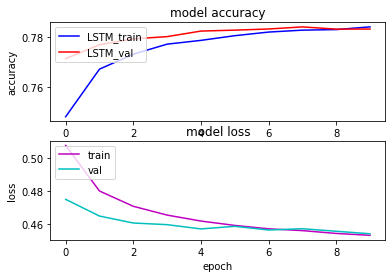

In [29]:
s, (at, al) = plt.subplots(2,1)

at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

The prediction score outputted by the model is between 0 and 1. We define a threshold value of 0.5 and decide that, if the score is above this value, the sentiment is "Positive", and "Negative" otherwise.

In [30]:
def decode_sentiment(score):
    if (score>0.5):
        return "Positive"
    else:
        return "Negative"

scores = model.predict(x_test, 
                       verbose = 1, 
                       batch_size = 10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

8/8 [==============================] - 11s 1s/step


### Confusion Matrix

In [31]:
# importing itertools library and methods
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [32]:
# define a function that plots the confusion matrix
def plot_confusion_matrix(cm, 
                          classes,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

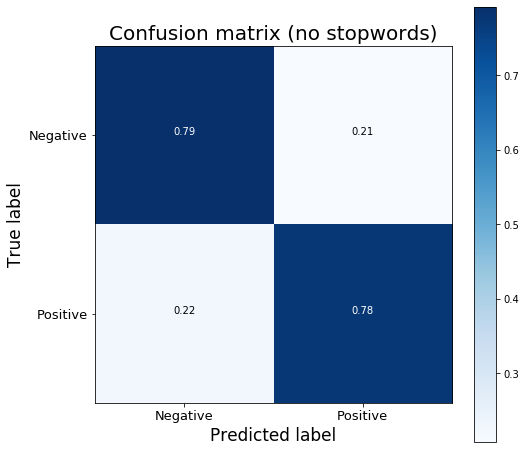

In [33]:
# we can take a look now
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix (no stopwords)")
plt.show();

We end this part by saving the model:

In [34]:
# saving the model
model.save_weights(MODEL_NAME)

# 2. With stopwords

Now we'll repeat what done until now, but setting the remove parameter for the function <em>preprocess</em> to False. This way we won't remove the stopwords from our texts. After this everything is gonna be the same, so you can move to the end of this section, where we'll check the results, and draw some conclusions.

In [35]:
df_keep_sw = df.copy()
df_keep_sw.text = df.text.apply(lambda x: preprocess(x, remove=False))

## Train and Test Split

In [36]:
# splitting dataset in train and test sets for both our datasets
train_data, test_data = train_test_split(df_keep_sw, 
                                        test_size = TEST_SIZE,
                                        random_state = 169)

In [37]:
# checking dimensions of our new datasets
print("Train Data size with stopwords:", len(train_data))
print("Test Data size with stopwords", len(test_data))

Train Data size with stopwords: 1520000
Test Data size with stopwords 80000


## Tokenization

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size with stopwords:", vocab_size)

Vocabulary Size with stopwords: 324647


We may see that, now, we have around 150 words more in our vocabulary, clearly the stopwords.

In [39]:
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X with stopwords shape:", x_train.shape)
print("Testing X with stopwords shape:", x_test.shape)

Training X with stopwords shape: (1520000, 30)
Testing X with stopwords shape: (80000, 30)


In [40]:
# instantiating and fitting our LabelEncoder
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

# transforming our encoder instances
y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

# reshaping them
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# showing their shapes
print("y_train keeping stopwords shape:", y_train.shape)
print("y_test keeping stopwords shape:", y_test.shape)

y_train keeping stopwords shape: (1520000, 1)
y_test keeping stopwords shape: (80000, 1)


## Word Embedding

In [41]:
MODEL_NAME = 'model_keep_sw.h5'

In [42]:
embeddings_index = {}
f = open(GLOVE_EMB)

for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [43]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [44]:
# finalising the embedding
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                            EMBEDDING_DIM,
                                            weights = [embedding_matrix],
                                            input_length = MAX_SEQUENCE_LENGTH,
                                            trainable = False)

## LSTM

In [45]:
# rebuilding our model, exactly the same
model = build_LSTM(MAX_SEQUENCE_LENGTH)

In [46]:
model.compile(optimizer = Adam(learning_rate = LR), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size = BATCH_SIZE, 
                    epochs = EPOCHS,
                    validation_data = (x_test, y_test))

Epoch 1/10
5938/5938 [==============================] - 1401s 236ms/step - loss: 0.4621 - accuracy: 0.7806 - val_loss: 0.4336 - val_accuracy: 0.7978
Epoch 2/10
5938/5938 [==============================] - 1275s 215ms/step - loss: 0.4257 - accuracy: 0.8030 - val_loss: 0.4076 - val_accuracy: 0.8110
Epoch 3/10
5938/5938 [==============================] - 983s 166ms/step - loss: 0.4141 - accuracy: 0.8097 - val_loss: 0.4000 - val_accuracy: 0.8176
Epoch 4/10
5938/5938 [==============================] - 1021s 172ms/step - loss: 0.4079 - accuracy: 0.8130 - val_loss: 0.3977 - val_accuracy: 0.8195
Epoch 5/10
5938/5938 [==============================] - 947s 160ms/step - loss: 0.4033 - accuracy: 0.8157 - val_loss: 0.3914 - val_accuracy: 0.8219
Epoch 6/10
5938/5938 [==============================] - 1357s 229ms/step - loss: 0.4002 - accuracy: 0.8177 - val_loss: 0.3928 - val_accuracy: 0.8223
Epoch 7/10
5938/5938 [==============================] - 1069s 180ms/step - loss: 0.3978 - accuracy: 0.8188 -

## Model Evaluation

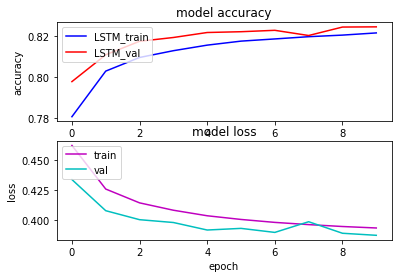

In [48]:
s, (at, al) = plt.subplots(2,1)

at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

We moved from an accuracy of more than 78%, using a dataset where we've removed the stopwords, to an accuracy of more than 82%, increasing the accuracy of our model of around 4%. This looks really promising, making a good use of a bunch of words that are considered <em>meaningless</em>. Let's produce the Confusion Matrix.

In [49]:
scores = model.predict(x_test, 
                       verbose = 1, 
                       batch_size = 10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

8/8 [==============================] - 8s 1s/step


### Confusion Matrix

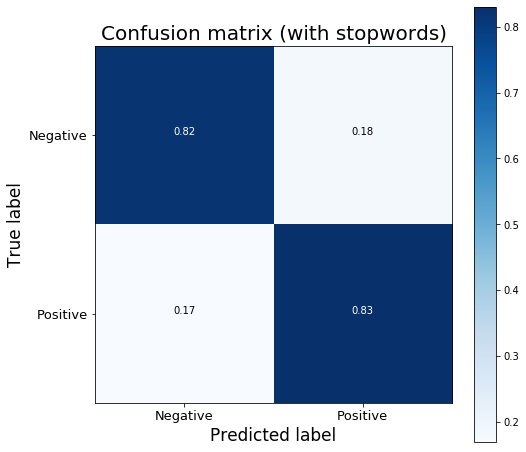

In [50]:
# checking confusion matrix
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes = test_data.sentiment.unique(), title="Confusion matrix (with stopwords)")
plt.show();

The increase is there, even using the validation set! Let's finish this part by saving the model and then we'll try to conclude this analysis.

In [51]:
# saving the model
model.save_weights(MODEL_NAME)

## Conclusions

In NLP, stopwords are everywhere defined as words that don't add meaning to the sentences we're analyzing. Everywhere is said that we may ignore them, without reducing the validity of our model. At this point, we don't know if the problem is with the stopwords set provided by the <em>Nltk</em> library, I personally believe that we could try different sets and maybe get better results, but still this is something we should be thinking about, while preprocessing our text in NLP. So my conclusion is: stopwords are <b>maybe</b> meaningless, but we should always take under serious consideration the idea of removing them from our text, because maybe they bring some meaning that we don't want to lose. 